 <h1 style="font-size:40px;font-weight=bold;"> FAKE NEWS CLASSIFIER </font> 
    
   
    
  <h2 style="font-size:30px;font-weight=bold;"> Exploring The Data </h2>

In [48]:
import pandas as pd
df=pd.read_csv("news.csv")
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [49]:
# to check NAN values

check_nan_in_df=df.isnull()
print(check_nan_in_df)

      Unnamed: 0  title   text  label
0          False  False  False  False
1          False  False  False  False
2          False  False  False  False
3          False  False  False  False
4          False  False  False  False
...          ...    ...    ...    ...
6330       False  False  False  False
6331       False  False  False  False
6332       False  False  False  False
6333       False  False  False  False
6334       False  False  False  False

[6335 rows x 4 columns]


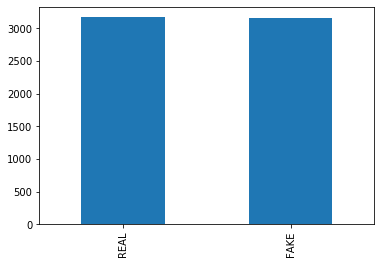

In [50]:
df["label"].value_counts().plot(kind = 'bar')

In [51]:
df["total"]=df["title"] + " " + df["text"]
df.head()

,Unnamed: 0,title,text,label,total
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...


 <h2 style="font-size:30px;font-weight=bold;"> Pre Processing The Data </h2>

In [52]:
#importing libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize


In [53]:
stop_words= stopwords.words("english")

#instantiating object
lemmatizer=WordNetLemmatizer()

for index,row in df.iterrows():
    filler_sentence=''
    sentence= row["total"]
    
    #cleaning the sentence with regex
    import re
    sentence=re.sub(r'[^\w\s]','',sentence)
    
    #tokenize
    words= nltk.word_tokenize(sentence)
    
    #stopwords removal
    words = [w for w in words if not w in stop_words]
    
    #Lemmatization
    for words in words:
        filler_sentence=filler_sentence + ' ' + str(lemmatizer.lemmatize(words)).lower()
    
    df.loc[index,'total']= filler_sentence

df.head()

,Unnamed: 0,title,text,label,total
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,you can smell hillarys fear daniel greenfield...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,watch the exact moment paul ryan committed po...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,kerry go paris gesture sympathy us secretary ...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,bernie supporter twitter erupt anger dnc we t...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,the battle new york why this primary matters ...


In [54]:
df.label = df.label.astype(str)
df.label = df.label.str.strip()
dict = {'REAL':'1', 'FAKE':'0'}
df["label"] = df["label"].map(dict)
df["label"].head()

0    0
1    0
2    1
3    0
4    1
Name: label, dtype: object

In [55]:
x_df = df["total"]
y_df = df["label"]

 <h2 style="font-size:30px;font-weight=bold;"> Vectorization </h2>




In [56]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(x_df)
freq_term_matrix = count_vectorizer.transform(x_df)

tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

print(tf_idf_matrix)

  (0, 84103)	0.02880344134538735
  (0, 84077)	0.03002128664210717
  (0, 83877)	0.018607343328196482
  (0, 83514)	0.03653774133019167
  (0, 83492)	0.023707364893939736
  (0, 83447)	0.03586754816546842
  (0, 83403)	0.02695875045200971
  (0, 83396)	0.019835943175965133
  (0, 83392)	0.008585159602852022
  (0, 83218)	0.01572657851425174
  (0, 83110)	0.014470516380511316
  (0, 83004)	0.027822220268486773
  (0, 83003)	0.016460792307242865
  (0, 82929)	0.03833530820382529
  (0, 82841)	0.024379366941566442
  (0, 82678)	0.0346212287472953
  (0, 82578)	0.035082475533552405
  (0, 82545)	0.018051125993657446
  (0, 82391)	0.013651104872461956
  (0, 82373)	0.014279148105824169
  (0, 82346)	0.018685412875057213
  (0, 82339)	0.060996642075652405
  (0, 82073)	0.01138273361804669
  (0, 82023)	0.03043943380028792
  (0, 81896)	0.04220672992179989
  :	:
  (6334, 9343)	0.06663788710149954
  (6334, 9341)	0.09390119973816259
  (6334, 9232)	0.01929156802079928
  (6334, 8729)	0.01751752612849853
  (6334, 8631)	0

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix, y_df, test_size=0.3,random_state=0)
                                   

 <h2 style="font-size:30px;font-weight=bold;"> Modelling </h2>

In [58]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4434, 85109)
(4434,)
(1901, 85109)
(1901,)


In [59]:
from sklearn.svm import SVC
svc_model=SVC()

In [60]:
svc_model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
y_predict=svc_model.predict(x_test)

 <h2 style="font-size:30px;font-weight=bold;"> Testing Performance </h2>

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       933
           1       0.95      0.91      0.93       968

    accuracy                           0.93      1901
   macro avg       0.93      0.93      0.93      1901
weighted avg       0.93      0.93      0.93      1901

